In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

# Generates the dataset
def generate_dataset(n_samples, d):
    theta_star = [1] + [0] * (d - 1)
    
    # Generate dataset with uniform distribution
    X = np.random.uniform(low=-1, high=1, size=(n_samples, d))
    prob = (1 + np.sum(X * theta_star, axis=1)) / 2
    y = np.zeros((n_samples,))
    for i in range(n_samples):
        y[i] = np.random.choice([-1, 1], p=[1-prob[i], prob[i]])

    return X, y
        
# Define logistic loss function
def ERM_loss(w, X, y):
    n_samples = X.shape[0]
    z = y * np.dot(X, w)
    return np.sum(np.log(1 + np.exp(-z))) / n_samples

# HRM loss function for logistic regression
def HRM_loss(theta, X, y, gamma, sigma):
    n_samples = X.shape[0]
    weights = generate_weights(n_samples, gamma, sigma)
    z = y * np.dot(X, theta)
    return np.sum(weights * np.log(1 + np.exp(-z))) / n_samples

# Define function to calculate gradient of log loss
def gradient_log_loss(w, X, y):
    N = X.shape[0]
    y = y.reshape(-1, 1) # Reshape y to have shape (n_samples, 1)
    return - X * (y / (1 + np.exp(y * np.dot(X, w))))

# Generate weights from a uniform distribution
def generate_weights(n_samples, gamma, sigma):
    p = np.random.uniform(size=n_samples)
    #p = np.random.binomial(n=1, p=0.5, size=n_samples)
    
    def weight_form(alpha):
        return (p**alpha)/(p**alpha + (1-p)**alpha)**(1/alpha)
    
    w = weight_form(gamma) + weight_form(sigma)
    return w

# Update the model parameters 𝜃 using the given update rule
def update_theta(theta, X, Y, learning_rate, flag, gamma=0.5, sigma=0.5):
    n_samples = X.shape[0]
    
    if flag==0:
        weights = np.ones(n_samples)
    else:
        weights = generate_weights(n_samples, gamma, sigma)
        
    weighted_gradients = np.zeros_like(theta)
    
    for i in range(n_samples):
        gradient = gradient_log_loss(theta, X[i], Y[i])
        weighted_gradients += weights[i] * gradient[0]
        
    theta_next = theta - learning_rate / n_samples * weighted_gradients
    return theta_next

# Iterative optimization procedure for the empirical minimizer of different L-Risks
def optimize_theta(X, Y, learning_rate, n_iterations, flag=0, gamma=0.5, sigma=0.5):
    n_features = X.shape[1]
    theta = np.zeros(n_features)
    loss_history = []
    n_samples = X.shape[0]

    for t in range(n_iterations):
        theta = update_theta(theta, X, Y, learning_rate, flag, gamma, sigma)

        if flag == 0:
            loss = ERM_loss(theta, X, Y)
        else:
            loss = HRM_loss(theta, X, Y, gamma, sigma)

        loss_history.append(loss)

    return theta, loss_history

# Defining model training function
def simulate_results(n_samples, d):
    loss_history = []
    
    for n_sample in n_samples:
        X, y = generate_dataset(n_sample, d)

        # Fit logistic regression model with history
        clf = LogisticRegression(solver='newton-cg', max_iter=100, tol=1e-4,
                                 verbose=1, warm_start=True, n_jobs=-1)
        clf.fit(X, y)
        loss = logistic_loss(clf.coef_.ravel(), X, y)
        loss_history.append(loss)
        
        # Print coefficients
        coef = clf.coef_
        print("Coefficients:", coef)
    
    return loss_history

# Define plotting function
def plot_losses(n_samples, losses):
    # Plot loss history
    plt.plot(n_samples, losses)
    plt.xlabel('N samples')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()

# Define dataset parameters
d = 10
n_samples = [1000]

20
21
24
26
29
31
35
38
42
46
51
56
61
67
74
81
89
98
108
119
131
143
158
173
190
209
230
252
277
305
335
368
404
444
488
536
589
647
711
781
858
942
1035
1137
1250
1373
1508
1657
1820
2000


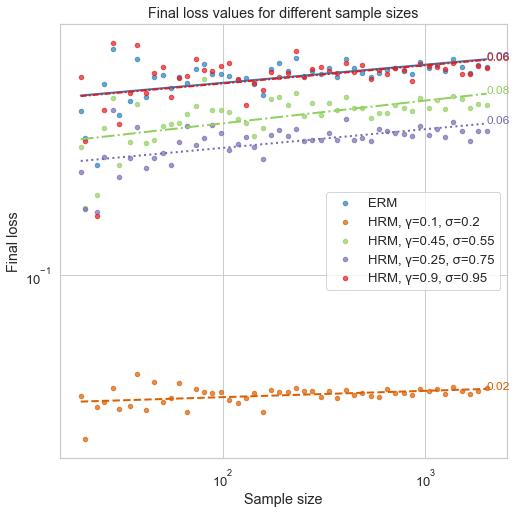

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = [8, 8]
np.random.seed(42)

def simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags):
    final_losses_sample_size = []

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            print(n_samples)
            X, Y = generate_dataset(n_samples, n_features)

            for flag in flags:
                if flag == 0:
                    theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag)
                    final_losses_sample_size.append((n_samples, loss_history[-1], flag))
                else:
                    for gamma, sigma in gamma_sigma_pairs:
                        theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag, gamma, sigma)
                        final_losses_sample_size.append((n_samples, loss_history[-1], flag, gamma, sigma))

    return final_losses_sample_size

def plot_results(final_losses_sample_size, sample_sizes):
    colors = ['#2c7fb8', '#d95f02', '#91cf60', '#756bb1', '#e31a1c']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    labels_added = set()
    line_data = {color: [] for color in colors}

    for loss_info in final_losses_sample_size:
        label = "ERM" if loss_info[2] == 0 else "HRM"
        if len(loss_info) > 3:
            label += f", γ={loss_info[3]}, σ={loss_info[4]}"
            color_index = gamma_sigma_pairs.index((loss_info[3], loss_info[4])) + 1
        else:
            color_index = 0

        if label not in labels_added:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], label=label, s=20, alpha=0.7)
            labels_added.add(label)
        else:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], s=20, alpha=0.7)

        line_data[colors[color_index]].append((loss_info[0], loss_info[1]))

    for color, data_points in line_data.items():
        if data_points:
            x_vals, y_vals = zip(*data_points)
            line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
            line_function = np.poly1d(line_coefficients)
            linestyle = linestyles[colors.index(color)]
            plt.plot(sample_sizes, np.exp(line_function(np.log(sample_sizes))), c=color, linestyle=linestyle, linewidth=2)
            plt.text(sample_sizes[-1], np.exp(line_function(np.log(sample_sizes[-1]))), f"{line_coefficients[0]:.2f}", color=color, fontsize=12)

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Final loss values for different sample sizes")
    plt.xlabel("Sample size")
    plt.ylabel("Final loss")
    plt.legend()
    plt.show()


# Parameters for simulations
learning_rate = 0.1
n_iterations = 1000

sample_sizes = np.logspace(np.log10(20), np.log10(2000), num=50).astype(int)
feature_sizes = [5]
gamma_sigma_pairs = [(0.1, 0.2), (0.45, 0.55), (0.25, 0.75), (0.9, 0.95)]
flags = [0, 1]

final_losses_sample_size = simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags)
plot_results(final_losses_sample_size, sample_sizes)


20
21
24
26
29
31
35
38
42
46
51
56
61
67
74
81
89
98
108
119
131
143
158
173
190
209
230
252
277
305
335
368
404
444
488
536
589
647
711
781
858
942
1035
1137
1250
1373
1508
1657
1820
2000


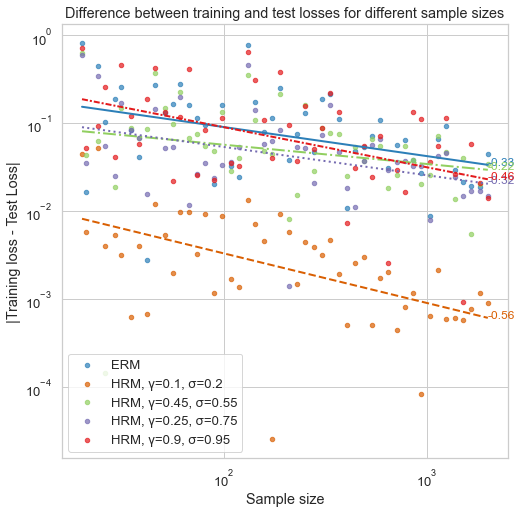

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = [8, 8]
np.random.seed(42)

def simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags):
    final_losses_sample_size = []

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            print(n_samples)
            X, Y = generate_dataset(n_samples, n_features)

            # Split the dataset into training and testing sets
            train_ratio = 0.8
            train_size = int(n_samples * train_ratio)
            X_train, X_test = X[:train_size], X[train_size:]
            Y_train, Y_test = Y[:train_size], Y[train_size:]

            for flag in flags:
                if flag == 0:
                    theta_optimized, _ = optimize_theta(X_train, Y_train, learning_rate, n_iterations, flag)
                    train_loss = ERM_loss(theta_optimized, X_train, Y_train)
                    test_loss = ERM_loss(theta_optimized, X_test, Y_test)
                    final_losses_sample_size.append((n_samples, np.abs(train_loss - test_loss), flag))
                else:
                    for gamma, sigma in gamma_sigma_pairs:
                        theta_optimized, _ = optimize_theta(X_train, Y_train, learning_rate, n_iterations, flag, gamma, sigma)
                        train_loss = HRM_loss(theta_optimized, X_train, Y_train, gamma, sigma)
                        test_loss = HRM_loss(theta_optimized, X_test, Y_test, gamma, sigma)
                        final_losses_sample_size.append((n_samples, np.abs(train_loss - test_loss), flag, gamma, sigma))

    return final_losses_sample_size

def plot_results(final_losses_sample_size, sample_sizes):
    colors = ['#2c7fb8', '#d95f02', '#91cf60', '#756bb1', '#e31a1c']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    labels_added = set()
    line_data = {color: [] for color in colors}

    for loss_info in final_losses_sample_size:
        label = "ERM" if loss_info[2] == 0 else "HRM"
        if len(loss_info) > 3:
            label += f", γ={loss_info[3]}, σ={loss_info[4]}"
            color_index = gamma_sigma_pairs.index((loss_info[3], loss_info[4])) + 1
        else:
            color_index = 0

        if label not in labels_added:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], label=label, s=20, alpha=0.7)
            labels_added.add(label)
        else:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], s=20, alpha=0.7)

        line_data[colors[color_index]].append((loss_info[0], loss_info[1]))

    for color, data_points in line_data.items():
        if data_points:
            x_vals, y_vals = zip(*data_points)
            line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
            line_function = np.poly1d(line_coefficients)
            linestyle = linestyles[colors.index(color)]
            plt.plot(sample_sizes, np.exp(line_function(np.log(sample_sizes))), c=color, linestyle=linestyle, linewidth=2)
            plt.text(sample_sizes[-1], np.exp(line_function(np.log(sample_sizes[-1]))), f"{line_coefficients[0]:.2f}", color=color, fontsize=12)

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Difference between training and test losses for different sample sizes")
    plt.xlabel("Sample size")
    plt.ylabel("|Training loss - Test Loss|")
    plt.legend()
    plt.show()


# Parameters for simulations
sample_sizes = np.logspace(np.log10(20), np.log10(2000), num=50).astype(int)
feature_sizes = [5]
gamma_sigma_pairs = [(0.1, 0.2), (0.45, 0.55), (0.25, 0.75), (0.9, 0.95)]
flags = [0, 1]

final_losses_sample_size1 = simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags)
plot_results(final_losses_sample_size1, sample_sizes)


5
5
6
7
8
9
10
11
13
14
16
18
21
24
27
30
34
39
44
49


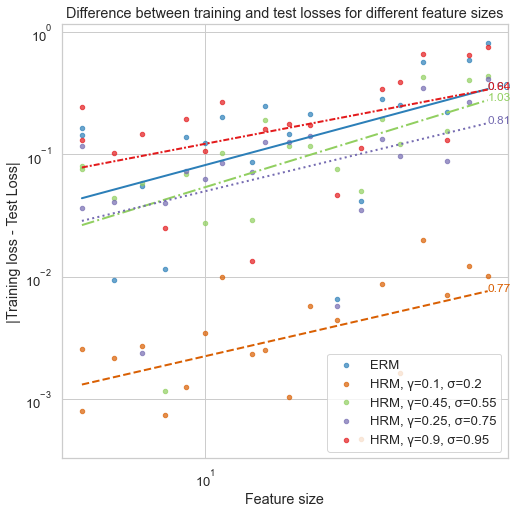

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = [8, 8]
np.random.seed(42)

def simulate_results_features(sample_sizes, feature_sizes, gamma_sigma_pairs, flags):
    final_losses_feature_size = []

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            print(n_features)
            X, Y = generate_dataset(n_samples, n_features)

            # Split the dataset into training and testing sets
            train_ratio = 0.8
            train_size = int(n_samples * train_ratio)
            X_train, X_test = X[:train_size], X[train_size:]
            Y_train, Y_test = Y[:train_size], Y[train_size:]

            for flag in flags:
                if flag == 0:
                    theta_optimized, _ = optimize_theta(X_train, Y_train, learning_rate, n_iterations, flag)
                    train_loss = ERM_loss(theta_optimized, X_train, Y_train)
                    test_loss = ERM_loss(theta_optimized, X_test, Y_test)
                    final_losses_feature_size.append((n_features, np.abs(train_loss - test_loss), flag))
                else:
                    for gamma, sigma in gamma_sigma_pairs:
                        theta_optimized, _ = optimize_theta(X_train, Y_train, learning_rate, n_iterations, flag, gamma, sigma)
                        train_loss = HRM_loss(theta_optimized, X_train, Y_train, gamma, sigma)
                        test_loss = HRM_loss(theta_optimized, X_test, Y_test, gamma, sigma)
                        final_losses_feature_size.append((n_features, np.abs(train_loss - test_loss), flag, gamma, sigma))

    return final_losses_feature_size

def plot_results(final_losses_sample_size, sample_sizes):
    colors = ['#2c7fb8', '#d95f02', '#91cf60', '#756bb1', '#e31a1c']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    labels_added = set()
    line_data = {color: [] for color in colors}

    for loss_info in final_losses_sample_size:
        label = "ERM" if loss_info[2] == 0 else "HRM"
        if len(loss_info) > 3:
            label += f", γ={loss_info[3]}, σ={loss_info[4]}"
            color_index = gamma_sigma_pairs.index((loss_info[3], loss_info[4])) + 1
        else:
            color_index = 0

        if label not in labels_added:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], label=label, s=20, alpha=0.7)
            labels_added.add(label)
        else:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], s=20, alpha=0.7)

        line_data[colors[color_index]].append((loss_info[0], loss_info[1]))

    for color, data_points in line_data.items():
        if data_points:
            x_vals, y_vals = zip(*data_points)
            line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
            line_function = np.poly1d(line_coefficients)
            linestyle = linestyles[colors.index(color)]
            plt.plot(sample_sizes, np.exp(line_function(np.log(sample_sizes))), c=color, linestyle=linestyle, linewidth=2)
            plt.text(sample_sizes[-1], np.exp(line_function(np.log(sample_sizes[-1]))), f"{line_coefficients[0]:.2f}", color=color, fontsize=12)

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Difference between training and test losses for different feature sizes")
    plt.xlabel("Feature size")
    plt.ylabel("|Training loss - Test Loss|")
    plt.legend()
    plt.show()


# Parameters for simulations
sample_sizes = [200]
feature_sizes = np.logspace(np.log10(5), np.log10(50), num=20).astype(int)
gamma_sigma_pairs = [(0.1, 0.2), (0.45, 0.55), (0.25, 0.75), (0.9, 0.95)]
flags = [0, 1]

final_losses_sample_size2 = simulate_results_features(sample_sizes, feature_sizes, gamma_sigma_pairs, flags)
plot_results(final_losses_sample_size2, feature_sizes)